# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('demo01_clean.csv')
X = df.drop('mau',axis=1)
y = df.mau

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

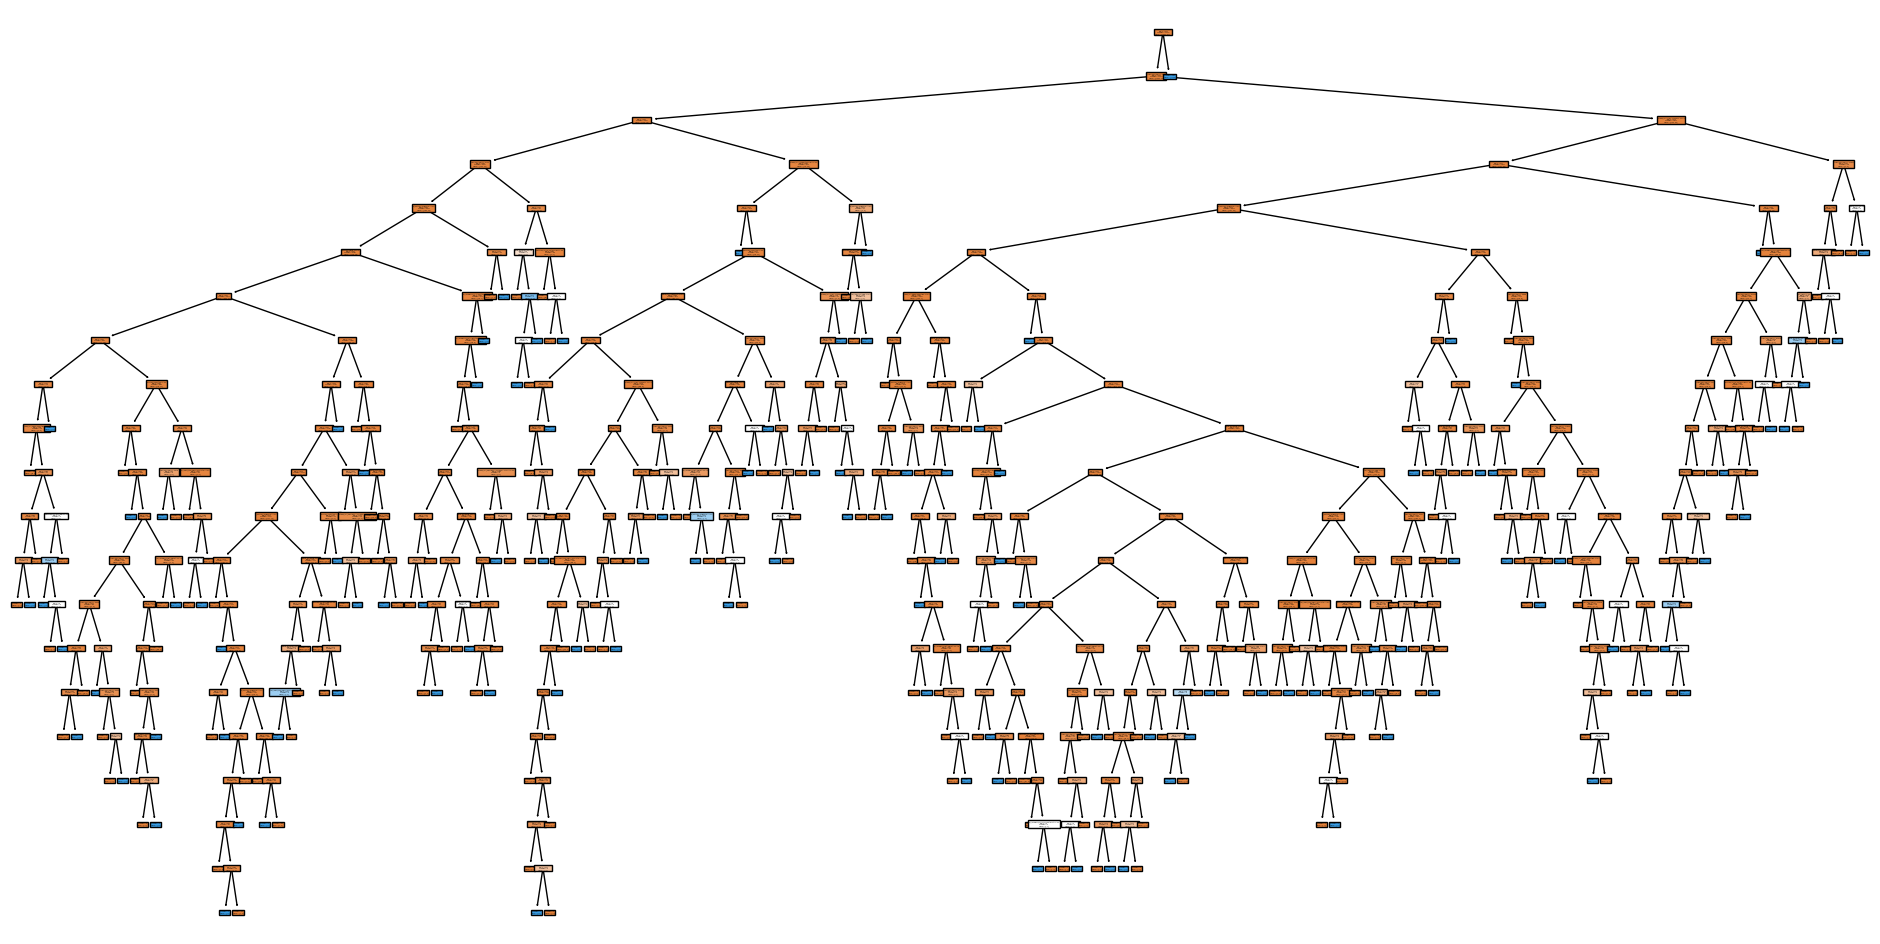

In [4]:
clf = DecisionTreeClassifier(random_state=100).fit(X_train,y_train)
plt.figure(figsize=(24,12))
plot_tree(clf,
         filled=True,
         feature_names=X_train.columns,
         );


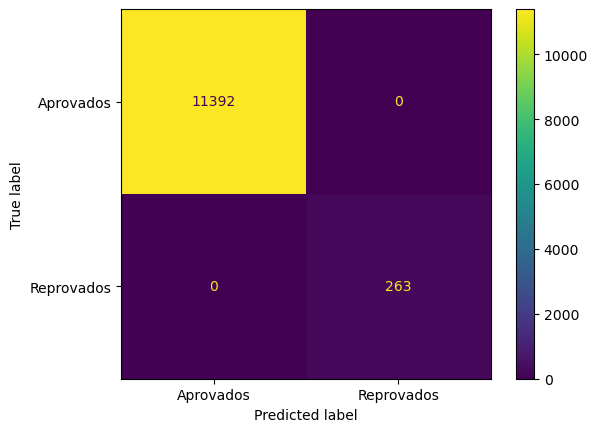

In [5]:
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=['Aprovados', 'Reprovados'])
plt.show() # MATRIZ DE CONFUSÃO DOS DADOS DE TREINO

In [6]:
predict = clf.predict(X_train)
ac1 = accuracy_score(y_train,predict);ac1

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

0.9793793793793794

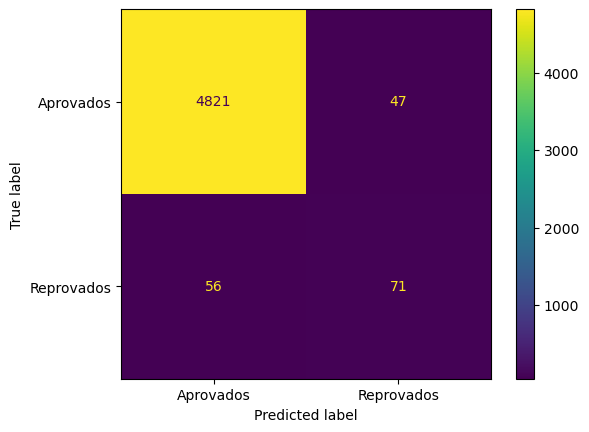

In [7]:
predict = clf.predict(X_test)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])
ac2 = accuracy_score(y_test,predict);ac2

**Comparando as duas acurácias**

In [8]:
print(f"Acurácia 1: {ac1} e Acurácia 2: {round(ac2,3)}")
print('Percebe-se que diminuiu um pouco mas a acurácia 2 continua extremamente alta em relação a primeira que é de 100%, que deve ser mais raro ainda.')

Acurácia 1: 1.0 e Acurácia 2: 0.979
Percebe-se que diminuiu um pouco mas a acurácia 2 continua extremamente alta em relação a primeira que é de 100%, que deve ser mais raro ainda.


0.9889317889317889

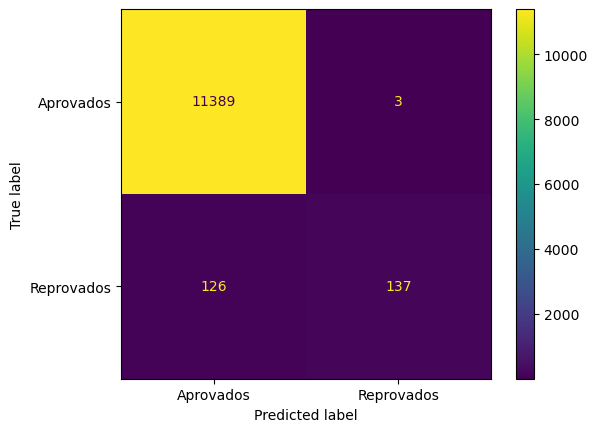

In [9]:
clf = DecisionTreeClassifier(random_state=123,max_depth=10,min_samples_leaf=5).fit(X_train,y_train)
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=['Aprovados', 'Reprovados'])
predict = clf.predict(X_train)
accuracy_score(y_train,predict)

0.9853853853853853

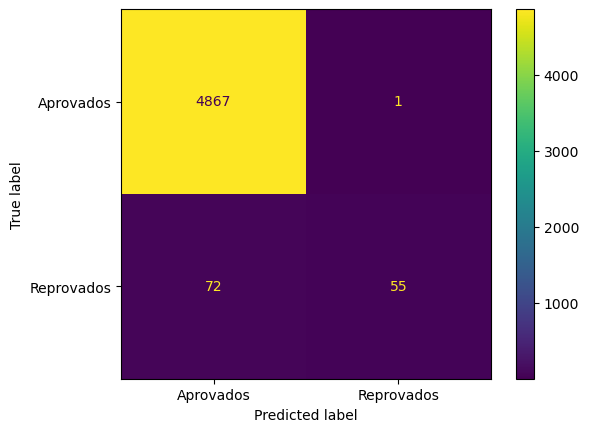

In [10]:
predict = clf.predict(X_test)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])
accuracy_score(y_test,predict)

In [13]:
new_y = y * 0
new_y.value_counts()

0    16650
Name: mau, dtype: int64

0.9882282282282282

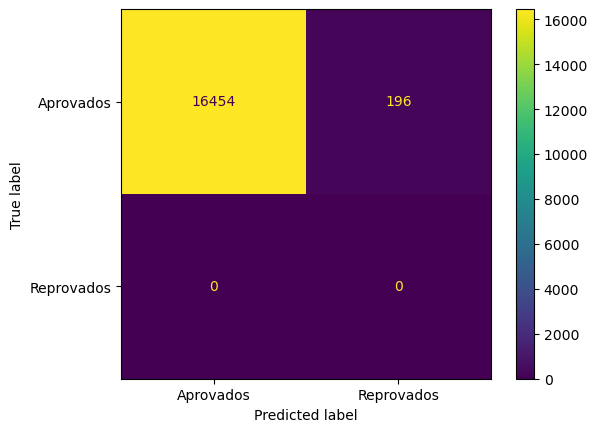

In [17]:
predict = clf.predict(X)
ConfusionMatrixDisplay.from_estimator(clf, X, new_y , display_labels=['Aprovados', 'Reprovados'])
accuracy_score(new_y ,predict)